In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import time
import numpy as np
import os
import os.path

In [2]:
# Set up different file path options
W_pth = 'H:\My Drive\Working Files CS\Analytics\WI Club Nights\WI Club Night - Pivot table.csv' # Windows path
L_pth = '/home/mike/Documents/Coding/Data/WI Club Night - Pivot table.csv' # Linux path

if os.path.exists(L_pth):
    data = pd.read_csv(L_pth)

elif os.path.exists(W_pth):
    data = pd.read_csv(W_pth)

else:
    print('Check if the dataset path is correct')

In [3]:
# display(data.head(3))

In [3]:
display(data.shape)

(492, 19)

In [4]:
# Convert time into the time format
data['Event Date'] = pd.to_datetime(data['Event Date'], format='%b %d, %Y')
data['Registration Time'] = pd.to_datetime(data['Registration Time'], format='%b %d, %Y %H:%M:%S')
data['Join Time'] = pd.to_datetime(data['Join Time'], format='%b %d, %Y %H:%M:%S', errors='coerce')
data['Leave Time'] = pd.to_datetime(data['Leave Time'], format='%b %d, %Y %H:%M:%S', errors='coerce')

In [5]:
# Convert Time in Session (minutes) into the integer format
data['Time in Session (minutes)'] = data['Time in Session (minutes)'].fillna(0)
data['Time in Session (minutes)'] = data['Time in Session (minutes)'].apply(lambda x: 0 if x == '--' else x)
data['Time in Session (minutes)'] = data['Time in Session (minutes)'].astype('int64')

In [6]:
# Define those who attended the event for longer than 5 mins
data['Attended (for more than 5 mins)'] = data['Time in Session (minutes)'].apply(lambda x: 1 if x >= 5 else 0)
data['Attended (for less than 5 mins)'] = data['Time in Session (minutes)'].apply(lambda x: 1 if 0 < x < 5 else 0)

#data[data['Time in Session (minutes)'] > 5]

In [7]:
# Modify columns to better reflect the status of isitors
data['Status'] = data['Attended']
data['Status'] = data['Status'].apply(lambda x: 'Attended' if x == 'Yes' else 'Registered')
data['Attended'] = data['Attended'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Approval Status'] = data['Approval Status'].apply(lambda x: 1 if x == 'approved' else 0)
data.rename(columns = {'Approval Status':'Registered'}, inplace = True)
data = data.drop('Is Guest', axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Event Date                       492 non-null    datetime64[ns]
 1   Topic                            492 non-null    object        
 2   Attended                         492 non-null    int64         
 3   User Name (Original Name)        492 non-null    object        
 4   First Name                       492 non-null    object        
 5   Last Name                        492 non-null    object        
 6   Email                            492 non-null    object        
 7   City                             217 non-null    object        
 8   Country/Region                   363 non-null    object        
 9   State/Province                   270 non-null    object        
 10  Phone                            161 non-null    object       

In [9]:
# Check missing values (not that important for this project)
null_data = data.isnull().sum()
display(null_data[null_data > 0])

City                   275
Country/Region         129
State/Province         222
Phone                  331
Join Time              288
Leave Time             288
Country/Region Name    110
Source Name             38
dtype: int64

In [10]:
# The number of attendees and their average watch time

reg_att_data = data.groupby(['Event Date'],as_index=False)[['Registered', 
                                                            'Attended',
                                                            'Attended (for more than 5 mins)', 
                                                            'Attended (for less than 5 mins)'
                                                            ]].sum()
display(reg_att_data.round(2))

,Event Date,Registered,Attended,Attended (for more than 5 mins),Attended (for less than 5 mins)
0,2022-04-05,99,42,37,5
1,2022-04-12,65,30,29,1
2,2022-04-26,77,23,18,5
3,2022-05-03,36,9,9,0
4,2022-05-10,37,18,16,2
5,2022-05-17,93,48,47,1
6,2022-05-24,45,19,18,1
7,2022-05-31,40,15,13,2


In [11]:
display(reg_att_data.describe())

,Registered,Attended,Attended (for more than 5 mins),Attended (for less than 5 mins)
count,8.000000,8.000000,8.000000,8.000000
mean,61.500000,25.500000,23.375000,2.125000
std,25.734912,13.554124,13.103298,1.885092
min,36.000000,9.000000,9.000000,0.000000
25%,39.250000,17.250000,15.250000,1.000000
50%,55.000000,21.000000,18.000000,1.500000
75%,81.000000,33.000000,31.000000,2.750000
max,99.000000,48.000000,47.000000,5.000000


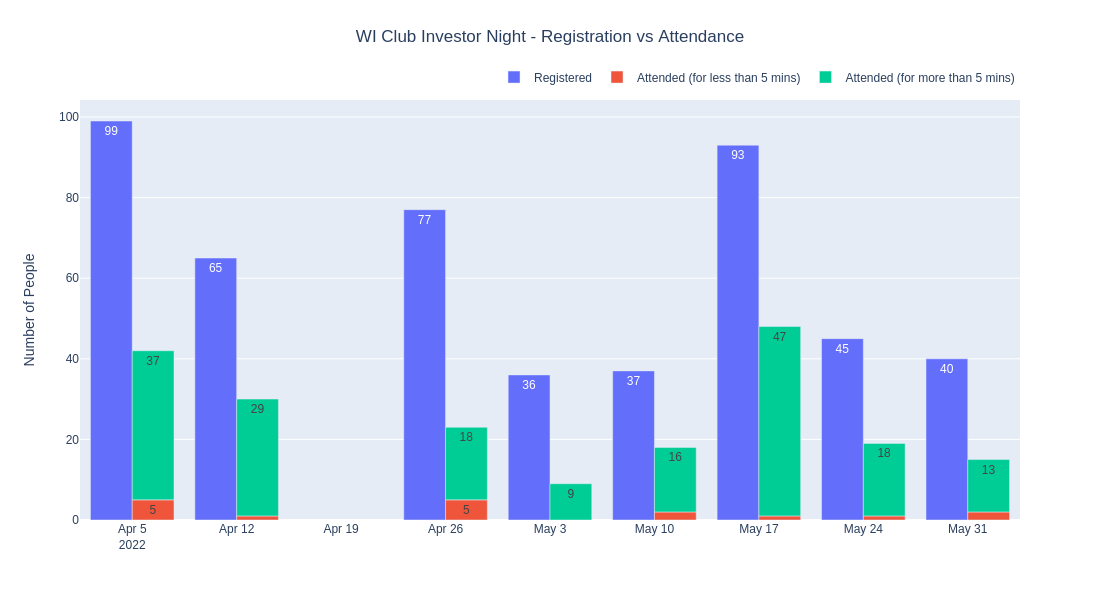

In [13]:
# Registration vs Attendance Barchart Overall
barchart = go.Figure(data=[
    go.Bar(
        name='Registered', 
        x=reg_att_data['Event Date'], 
        y=reg_att_data['Registered'],
        text=reg_att_data['Registered'],
        offsetgroup=0,
#         marker_color='rgb(54, 28, 84)'
    ),
    
    go.Bar(
        name='Attended (for less than 5 mins)', 
        x=reg_att_data['Event Date'], 
        y=reg_att_data['Attended (for less than 5 mins)'],
        text=reg_att_data['Attended (for less than 5 mins)'],
        offsetgroup=1,
#         marker_color='rgb(213, 189, 147)'
    ),
    
    go.Bar(
        name='Attended (for more than 5 mins)', 
        x=reg_att_data['Event Date'], 
        y=reg_att_data['Attended (for more than 5 mins)'],
        text=reg_att_data['Attended (for more than 5 mins)'],
        offsetgroup=1,
        base=reg_att_data['Attended (for less than 5 mins)'],
#         marker_color='rgb(118, 92, 46)'
    )
])

# Change the bar mode
barchart.update_layout(
        title="WI Club Investor Night - Registration vs Attendance",
        title_x=0.5,
        title_y=0.95,
        yaxis_title="Number of People",
        width=1100,
        height=600,
        legend=dict(orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1,
        bgcolor='rgba(255, 255, 255, 0)', # transparent legend background
        bordercolor='rgba(255, 255, 255, 0)' # transparent legend borders
    )
    )
barchart.show('png')

In [14]:
# # Saving the barchart in a file

# t = time.localtime()
# timestamp = time.strftime('%Y-%m-%d', t)
# barchart_file_name = (' - Registrations vs Attendees Barchart - ' + timestamp)
# location_windows = "H:\My Drive\Working Files CS\Analytics\WI Club Nights\WI Club Night"
# pio.write_image(barchart, (location_windows + barchart_file_name + '.png'), format='png', width=1100, height=600)


## Stats on unique viewers

In [14]:
# Displaying unique registrations and attendees
reg_unique = data['Email'].nunique()
print('{} unique registrations across all events'.format(reg_unique))

mask = data[data['Attended'] == 1]
att_unique = mask['Email'].nunique()
print('{} unique attendees across all events'.format(att_unique))

conversion = (att_unique/reg_unique)*100
print('Average conversion is {}%'.format(round(conversion, 2)))

344 unique registrations across all events
165 unique attendees across all events
Average conversion is 47.97%


In [15]:
# The number of attendees and their average watch time
pie_data = data.groupby(['Email'],as_index=False)[['Registered', 
                                                   'Attended (for more than 5 mins)', 
                                                   'Attended (for less than 5 mins)'
                                                   ]].sum()

In [16]:
# Describe how many times has users attended the events
def get_attendance(value):
    if value == 1:
        return 'once'
    elif value == 2:
        return 'twice'
    elif value > 2:
        return 'three times or more'
    else: 
        return 0

pie_data['Attended'] = pie_data['Attended (for more than 5 mins)'].apply(get_attendance)

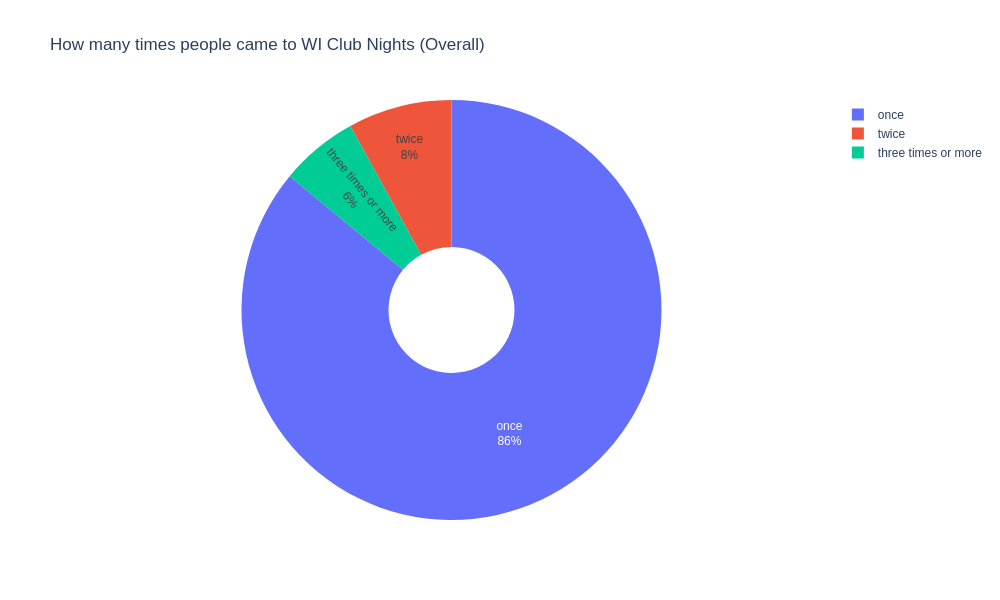

In [17]:
# Visualise how many times people came to the events
mask = pie_data[pie_data['Attended (for more than 5 mins)'] > 0]
pie_data2 = mask['Attended'].value_counts(normalize=True)
piechart = px.pie(
    pie_data2,
    values='Attended',
    names=pie_data2.index,
    width=1000,
    height=600,
    hole=0.3,
    title='How many times people came to WI Club Nights (Overall)'
)
piechart.update_traces(textinfo='percent+label')
piechart.show('png')


In [19]:
# piechart_file_name = (' - Repeat Attendees Pie Total - ' + timestamp)
# pio.write_image(piechart, (location_windows + piechart_file_name + '.png'), format='png', width=1000, height=600)

## Stats on 17.05.2022 web 3.0

In [18]:
# Extracting dvisitors of this event and checking its start and end
data_17_05_2022 = data[data['Event Date'] == '2022-05-17'].sort_values(by='Join Time', ignore_index=True)
start_17_05_2022 = data_17_05_2022['Join Time'][0]
print('The first attendee joined at ' + str(start_17_05_2022))

data_17_05_2022 = data[data['Event Date'] == '2022-05-17'].sort_values(by='Leave Time', ignore_index=True, ascending=False)
end_17_05_2022 = data_17_05_2022['Leave Time'][0]
print('The last attendee left at ' + str(end_17_05_2022))


The first attendee joined at 2022-05-17 17:22:54
The last attendee left at 2022-05-17 19:29:12


In [19]:
# Set up a table with the time
rng = pd.date_range(start_17_05_2022, end_17_05_2022, freq="min")
timetable_17_05_2022 = pd.DataFrame({ 'Time': rng, 'Watching_17_05_2022': 0 })
# print(timetable_17_05_2022)

In [20]:
# Count the number of viewers at each given minute
def get_attendance_per_minute(time):
    count = 0
    for row in data_17_05_2022['Join Time']:
        if time > row:
            count += 1
    for line in data_17_05_2022['Leave Time']:
        if time > line:
            count -= 1
    return (count)

timetable_17_05_2022['Watching_17_05_2022'] = timetable_17_05_2022['Time'].apply(get_attendance_per_minute)

# display(timetable_17_05_2022)

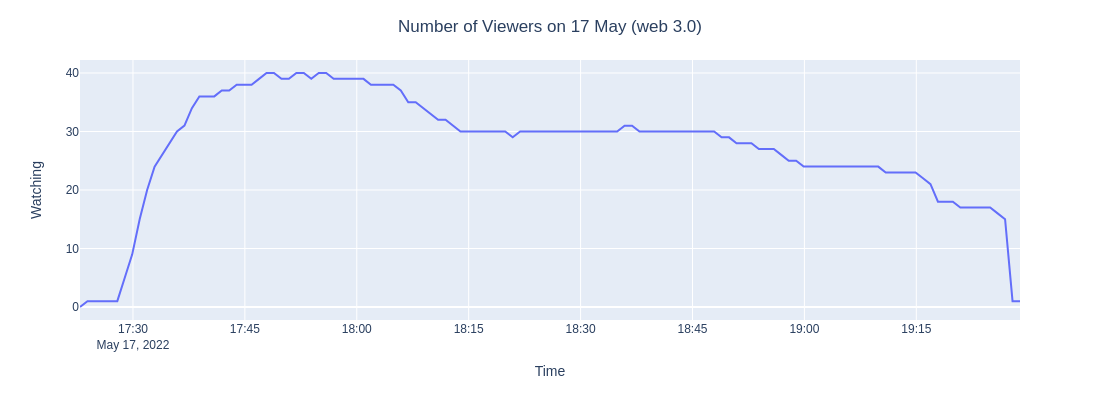

In [21]:
# Visualise the attendance dynamics
linechart_17_05_2022 = px.line(data_frame=timetable_17_05_2022, x = 'Time', y='Watching_17_05_2022')
linechart_17_05_2022.update_layout(
        title="Number of Viewers on 17 May (web 3.0)",
        title_x=0.5,
        title_y=0.95,
        width=1100,
        height=400,
        yaxis_title="Watching"
        )
linechart_17_05_2022.show('png')

In [24]:
# linechart_17_05_2022_file_name = (' - Attendees Line Chart 2022-05-17 - ' + timestamp)
# pio.write_image(linechart_17_05_2022, (location_windows + linechart_17_05_2022_file_name + '.png'), format='png', width=1100, height=400)

## Stats on 10 May (Property & Funds)

In [22]:
# Extracting dvisitors of this event and checking its start and end
data_10_05_2022 = data[data['Event Date'] == '2022-05-10'].sort_values(by='Join Time', ignore_index=True)
start_10_05_2022 = data_10_05_2022['Join Time'][0]
print('The first attendee joined at ' + str(start_10_05_2022))

data_10_05_2022 = data[data['Event Date'] == '2022-05-10'].sort_values(by='Leave Time', ignore_index=True, ascending=False)
end_10_05_2022 = data_10_05_2022['Leave Time'][0]
print('The last attendee left at ' + str(end_10_05_2022))

The first attendee joined at 2022-05-10 17:31:07
The last attendee left at 2022-05-10 19:16:06


In [23]:
# Set up a table with the time
rng = pd.date_range(start_10_05_2022, end_10_05_2022, freq="min")
timetable_10_05_2022 = pd.DataFrame({ 'Time': rng, 'Watching_10_05_2022': 0 })
# print(timetable_10_05_2022)

In [24]:
# Count the number of viewers at each given minute
def get_attendance_per_minute(time):
    count = 0
    for row in data_10_05_2022['Join Time']:
        if time > row:
            count += 1
    for line in data_10_05_2022['Leave Time']:
        if time > line:
            count -= 1
    return (count)

timetable_10_05_2022['Watching_10_05_2022'] = timetable_10_05_2022['Time'].apply(get_attendance_per_minute)

# display(timetable_10_05_2022)

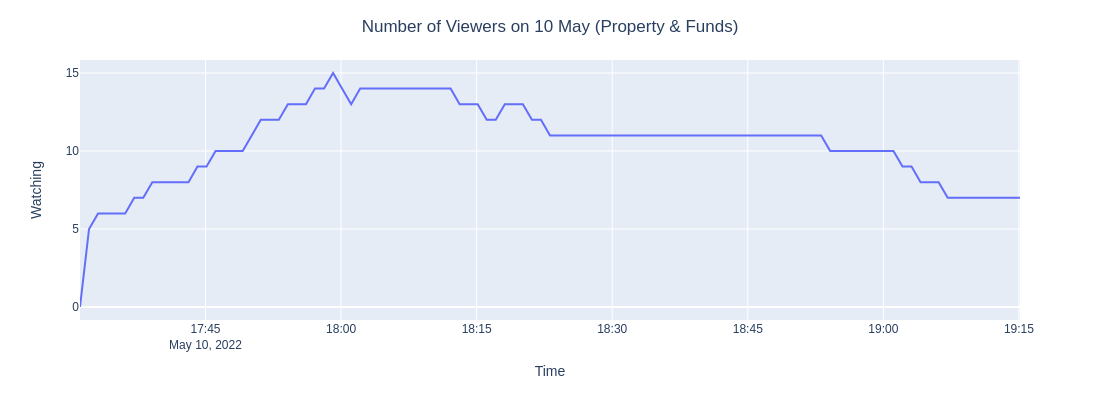

In [26]:
# Visualise the attendance dynamics
linechart_10_05_2022 = px.line(data_frame=timetable_10_05_2022, x = 'Time', y='Watching_10_05_2022')
linechart_10_05_2022.update_layout(
        title="Number of Viewers on 10 May (Property & Funds)",
        title_x=0.5,
        title_y=0.95,
        width=1100,
        height=400,
        yaxis_title="Watching"
        )
linechart_10_05_2022.show('png')

In [29]:
# linechart_10_05_2022_file_name = (' - Attendees Line Chart 2022-05-10 - ' + timestamp)
# pio.write_image(linechart_10_05_2022, (location_windows + linechart_10_05_2022_file_name + '.png'), format='png', width=1100, height=400)

## Stats on 3.05.22 (Software, Platforms & Marketplaces)

In [27]:
# Extracting dvisitors of this event and checking its start and end
data_03_05_2022 = data[data['Event Date'] == '2022-05-03'].sort_values(by='Join Time', ignore_index=True)
start_03_05_2022 = data_03_05_2022['Join Time'][0]
print('The first attendee joined at ' + str(start_03_05_2022))

data_03_05_2022 = data[data['Event Date'] == '2022-05-03'].sort_values(by='Leave Time', ignore_index=True, ascending=False)
end_03_05_2022 = data_03_05_2022['Leave Time'][0]
print('The last attendee left at ' + str(end_03_05_2022))

The first attendee joined at 2022-05-03 17:22:05
The last attendee left at 2022-05-03 19:14:46


In [28]:
# Set up a table with the time
rng = pd.date_range(start_03_05_2022, end_03_05_2022, freq="min")
timetable_03_05_2022 = pd.DataFrame({ 'Time': rng, 'Watching_03_05_2022': 0 })
# print(timetable_03_05_2022)

In [29]:
# Count the number of viewers at each given minute
def get_attendance_per_minute(time):
    count = 0
    for row in data_03_05_2022['Join Time']:
        if time > row:
            count += 1
    for line in data_03_05_2022['Leave Time']:
        if time > line:
            count -= 1
    return (count)

timetable_03_05_2022['Watching_03_05_2022'] = timetable_03_05_2022['Time'].apply(get_attendance_per_minute)

# display(timetable_03_05_2022)

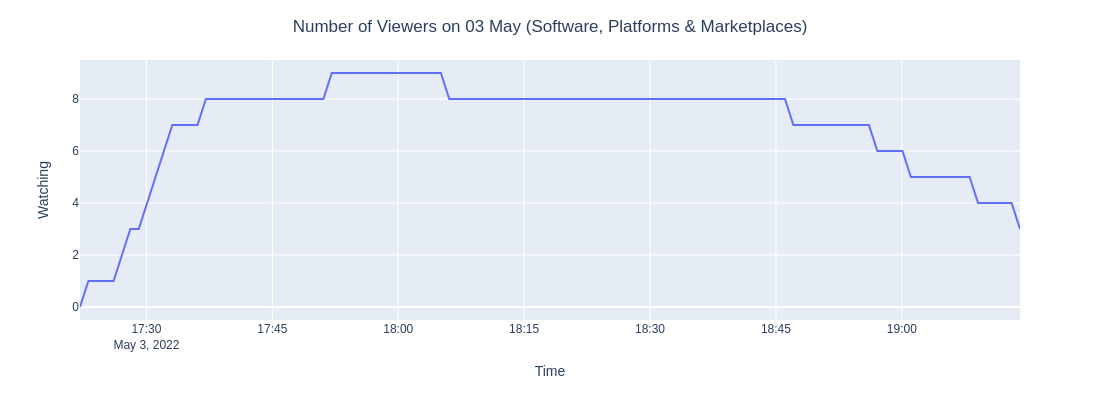

In [30]:
# Visualise the attendance dynamics
linechart_03_05_2022 = px.line(data_frame=timetable_03_05_2022, x = 'Time', y='Watching_03_05_2022')
linechart_03_05_2022.update_layout(
        title="Number of Viewers on 03 May (Software, Platforms & Marketplaces)",
        title_x=0.5,
        title_y=0.95,
        width=1100,
        height=400,
        yaxis_title="Watching"
        )
linechart_03_05_2022.show('png')

In [34]:
# linechart_03_05_2022_file_name = (' - Attendees Line Chart 2022-05-03 - ' + timestamp)
# pio.write_image(linechart_03_05_2022, (location_windows + linechart_03_05_2022_file_name + '.png'), format='png', width=1100, height=400)

## Stats on 26.04.22 (Funds, Fintech & Financial Services)

In [31]:
# Extracting dvisitors of this event and checking its start and end
data_26_04_2022 = data[data['Event Date'] == '2022-04-26'].sort_values(by='Join Time', ignore_index=True)
start_26_04_2022 = data_26_04_2022['Join Time'][0]
print('The first attendee joined at ' + str(start_26_04_2022))

data_26_04_2022 = data[data['Event Date'] == '2022-04-26'].sort_values(by='Leave Time', ignore_index=True, ascending=False)
end_26_04_2022 = data_26_04_2022['Leave Time'][3]
print('The last attendee left at ' + str(end_26_04_2022))

The first attendee joined at 2022-04-26 17:33:38
The last attendee left at 2022-04-26 19:35:33


In [32]:
# Set up a table with the time
rng = pd.date_range(start_26_04_2022, end_26_04_2022, freq="min")
timetable_26_04_2022 = pd.DataFrame({ 'Time': rng, 'Watching_26_04_2022': 0 })
# print(timetable_26_04_2022)

In [33]:
# Count the number of viewers at each given minute
def get_attendance_per_minute(time):
    count = 0
    for row in data_26_04_2022['Join Time']:
        if time > row:
            count += 1
    for line in data_26_04_2022['Leave Time']:
        if time > line:
            count -= 1
    return (count)

timetable_26_04_2022['Watching_26_04_2022'] = timetable_26_04_2022['Time'].apply(get_attendance_per_minute)

# display(timetable_26_04_2022)

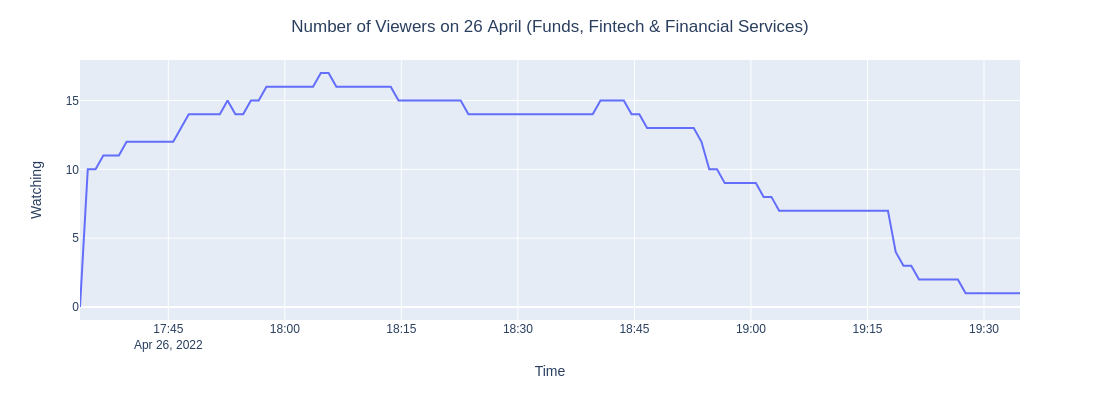

In [35]:
# Visualise the attendance dynamics
linechart_26_04_2022 = px.line(data_frame=timetable_26_04_2022, x = 'Time', y='Watching_26_04_2022')
linechart_26_04_2022.update_layout(
        title="Number of Viewers on 26 April (Funds, Fintech & Financial Services)",
        title_x=0.5,
        title_y=0.95,
        width=1100,
        height=400,
        yaxis_title="Watching"
        )
linechart_26_04_2022.show('png')

In [39]:
# linechart_26_04_2022_file_name = (' - Attendees Line Chart 2022-04-26 - ' + timestamp)
# pio.write_image(linechart_26_04_2022, (location_windows + linechart_26_04_2022_file_name + '.png'), format='png', width=1100, height=400)

## Stats on 12.04.22 (Medical Devices, Biotech & Healthtech)

In [36]:
# Extracting dvisitors of this event and checking its start and end
data_12_04_2022 = data[data['Event Date'] == '2022-04-12'].sort_values(by='Join Time', ignore_index=True)
start_12_04_2022 = data_12_04_2022['Join Time'][0]
print('The first attendee joined at ' + str(start_12_04_2022))

data_12_04_2022 = data[data['Event Date'] == '2022-04-12'].sort_values(by='Leave Time', ignore_index=True, ascending=False)
end_12_04_2022 = data_12_04_2022['Leave Time'][0]
print('The last attendee left at ' + str(end_12_04_2022))

The first attendee joined at 2022-04-12 17:18:10
The last attendee left at 2022-04-12 19:24:44


In [37]:
# Set up a table with the time
rng = pd.date_range(start_12_04_2022, end_12_04_2022, freq="min")
timetable_12_04_2022 = pd.DataFrame({ 'Time': rng, 'Watching_12_04_2022': 0 })
# print(timetable_12_04_2022)

In [38]:
# Count the number of viewers at each given minute
def get_attendance_per_minute(time):
    count = 0
    for row in data_12_04_2022['Join Time']:
        if time > row:
            count += 1
    for line in data_12_04_2022['Leave Time']:
        if time > line:
            count -= 1
    return (count)

timetable_12_04_2022['Watching_12_04_2022'] = timetable_12_04_2022['Time'].apply(get_attendance_per_minute)

# display(timetable_12_04_2022)

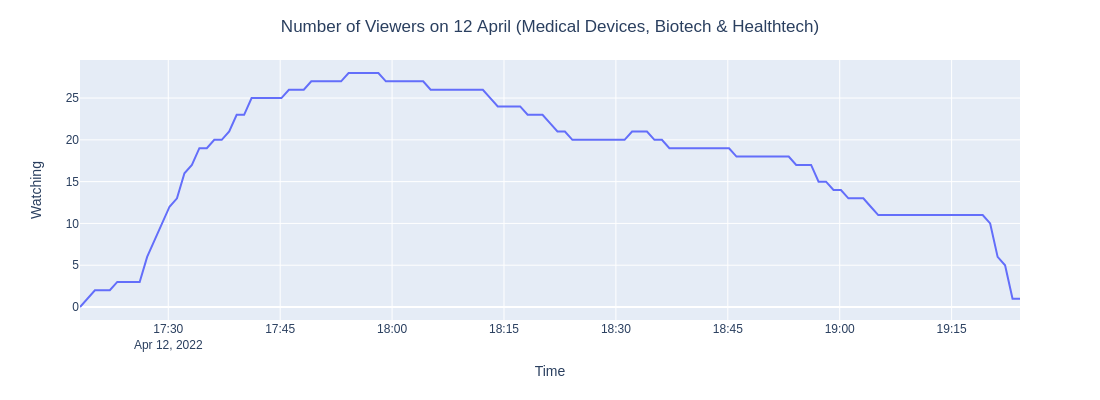

In [39]:
# Visualise the attendance dynamics
linechart_12_04_2022 = px.line(data_frame=timetable_12_04_2022, x = 'Time', y='Watching_12_04_2022')
linechart_12_04_2022.update_layout(
        title="Number of Viewers on 12 April (Medical Devices, Biotech & Healthtech)",
        title_x=0.5,
        title_y=0.95,
        width=1100,
        height=400,
        yaxis_title="Watching"
        )
linechart_12_04_2022.show('png')

In [44]:
# linechart_12_04_2022_file_name = (' - Attendees Line Chart 2022-04-12 - ' + timestamp)
# pio.write_image(linechart_12_04_2022, (location_windows + linechart_12_04_2022_file_name + '.png'), format='png', width=1100, height=400)

## Stats on 5.04.22 (Renewables & ESG)

In [40]:
# Extracting dvisitors of this event and checking its start and end
data_05_04_2022 = data[data['Event Date'] == '2022-04-05'].sort_values(by='Join Time', ignore_index=True)
start_05_04_2022 = data_05_04_2022['Join Time'][0]
print('The first attendee joined at ' + str(start_05_04_2022))

data_05_04_2022 = data[data['Event Date'] == '2022-04-05'].sort_values(by='Leave Time', ignore_index=True, ascending=False)
end_05_04_2022 = data_05_04_2022['Leave Time'][0]
print('The last attendee left at ' + str(end_05_04_2022))

The first attendee joined at 2022-04-05 17:13:30
The last attendee left at 2022-04-05 19:22:55


In [41]:
# Set up a table with the time
rng = pd.date_range(start_05_04_2022, end_05_04_2022, freq="min")
timetable_05_04_2022 = pd.DataFrame({ 'Time': rng, 'Watching_05_04_2022': 0 })
# print(timetable_05_04_2022)

In [42]:
# Count the number of viewers at each given minute
def get_attendance_per_minute(time):
    count = 0
    for row in data_05_04_2022['Join Time']:
        if time > row:
            count += 1
    for line in data_05_04_2022['Leave Time']:
        if time > line:
            count -= 1
    return (count)

timetable_05_04_2022['Watching_05_04_2022'] = timetable_05_04_2022['Time'].apply(get_attendance_per_minute)

# display(timetable_05_04_2022)

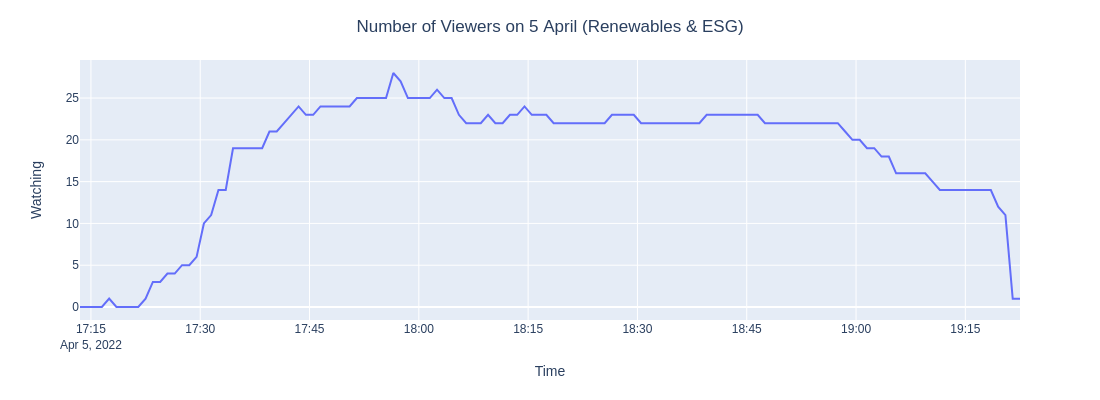

In [43]:
# Visualise the attendance dynamics
linechart_05_04_2022 = px.line(data_frame=timetable_05_04_2022, x = 'Time', y='Watching_05_04_2022')
linechart_05_04_2022.update_layout(
        title="Number of Viewers on 5 April (Renewables & ESG)",
        title_x=0.5,
        title_y=0.95,
        width=1100,
        height=400,
        yaxis_title="Watching"
        )
linechart_05_04_2022.show('png')

In [49]:
# linechart_05_04_2022_file_name = (' - Attendees Line Chart 2022-04-05 - ' + timestamp)
# pio.write_image(linechart_05_04_2022, (location_windows + linechart_05_04_2022_file_name + '.png'), format='png', width=1100, height=400)

## Stats on 24.05.22 (Funds, Fintech & Financial Services - 2)

In [44]:
# Extracting dvisitors of this event and checking its start and end
data_24_05_2022 = data[data['Event Date'] == '2022-05-24'].sort_values(by='Join Time', ignore_index=True)
start_24_05_2022 = data_24_05_2022['Join Time'][0]
print('The first attendee joined at ' + str(start_24_05_2022))

data_24_05_2022 = data[data['Event Date'] == '2022-05-24'].sort_values(by='Leave Time', ignore_index=True, ascending=False)
end_24_05_2022 = data_24_05_2022['Leave Time'][3]
print('The last attendee left at ' + str(end_24_05_2022))

The first attendee joined at 2022-05-24 17:35:06
The last attendee left at 2022-05-24 18:56:33


In [45]:
# Set up a table with the time
rng = pd.date_range(start_24_05_2022, end_24_05_2022, freq="min")
timetable_24_05_2022 = pd.DataFrame({ 'Time': rng, 'Watching_24_05_2022': 0 })
# print(timetable_24_05_2022)

In [46]:
# Count the number of viewers at each given minute
def get_attendance_per_minute(time):
    count = 0
    for row in data_24_05_2022['Join Time']:
        if time > row:
            count += 1
    for line in data_24_05_2022['Leave Time']:
        if time > line:
            count -= 1
    return (count)

timetable_24_05_2022['Watching_24_05_2022'] = timetable_24_05_2022['Time'].apply(get_attendance_per_minute)

# display(timetable_24_05_2022)

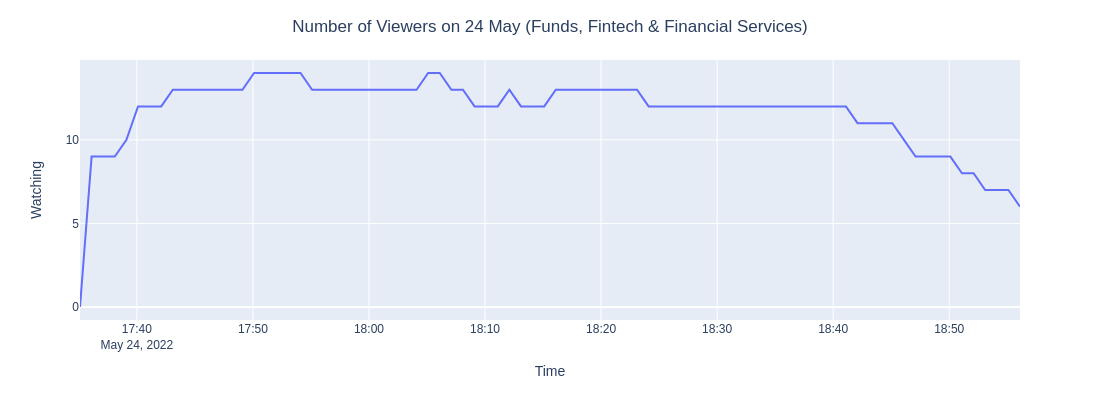

In [47]:
# Visualise the attendance dynamics
linechart_24_05_2022 = px.line(data_frame=timetable_24_05_2022, x = 'Time', y='Watching_24_05_2022')
linechart_24_05_2022.update_layout(
        title="Number of Viewers on 24 May (Funds, Fintech & Financial Services)",
        title_x=0.5,
        title_y=0.95,
        width=1100,
        height=400,
        yaxis_title="Watching"
        )
linechart_24_05_2022.show('png')

In [54]:
# linechart_24_05_2022_file_name = (' - Attendees Line Chart 2022-05-24 - ' + timestamp)
# pio.write_image(linechart_24_05_2022, (location_windows + linechart_24_05_2022_file_name + '.png'), format='png', width=1100, height=400)

## Stats on 31.05.22 (ASX & pre-IPO)

In [48]:
# Extracting dvisitors of this event and checking its start and end
data_31_05_2022 = data[data['Event Date'] == '2022-05-31'].sort_values(by='Join Time', ignore_index=True)
start_31_05_2022 = data_31_05_2022['Join Time'][0]
print('The first attendee joined at ' + str(start_31_05_2022))

data_31_05_2022 = data[data['Event Date'] == '2022-05-31'].sort_values(by='Leave Time', ignore_index=True, ascending=False)
end_31_05_2022 = data_31_05_2022['Leave Time'][3]
print('The last attendee left at ' + str(end_31_05_2022))

The first attendee joined at 2022-05-31 17:30:30
The last attendee left at 2022-05-31 18:51:21


In [49]:
# Set up a table with the time
rng = pd.date_range(start_31_05_2022, end_31_05_2022, freq="min")
timetable_31_05_2022 = pd.DataFrame({ 'Time': rng, 'Watching_31_05_2022': 0 })
# print(timetable_31_05_2022)

In [50]:
# Count the number of viewers at each given minute
def get_attendance_per_minute(time):
    count = 0
    for row in data_31_05_2022['Join Time']:
        if time > row:
            count += 1
    for line in data_31_05_2022['Leave Time']:
        if time > line:
            count -= 1
    return (count)

timetable_31_05_2022['Watching_31_05_2022'] = timetable_31_05_2022['Time'].apply(get_attendance_per_minute)

# display(timetable_31_05_2022)

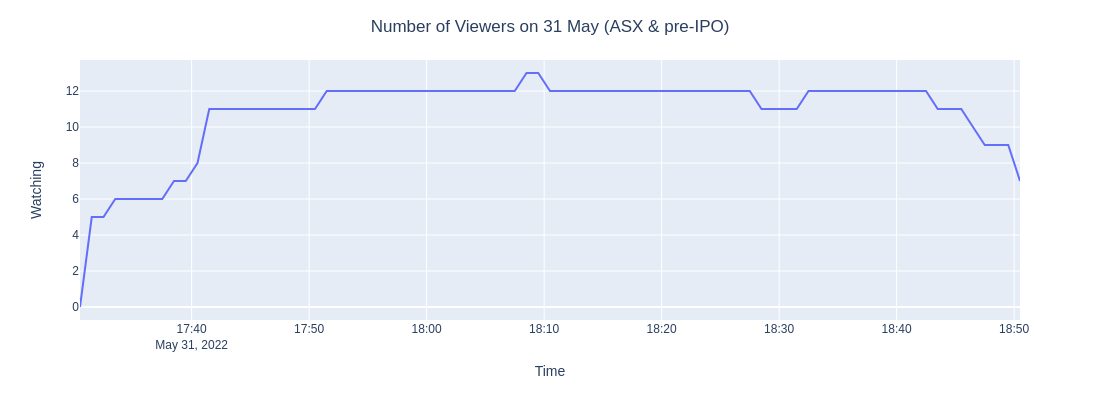

In [51]:
# Visualise the attendance dynamics
linechart_31_05_2022 = px.line(data_frame=timetable_31_05_2022, x = 'Time', y='Watching_31_05_2022')
linechart_31_05_2022.update_layout(
        title="Number of Viewers on 31 May (ASX & pre-IPO)",
        title_x=0.5,
        title_y=0.95,
        width=1100,
        height=400,
        yaxis_title="Watching"
        )
linechart_31_05_2022.show('png')

In [59]:
# linechart_31_05_2022_file_name = (' - Attendees Line Chart 2022-05-31 - ' + timestamp)
# pio.write_image(linechart_31_05_2022, (location_windows + linechart_31_05_2022_file_name + '.png'), format='png', width=1100, height=400)

## Minute-by-minute attendee overall report

In [52]:
timetable_05_04_2022['Time'] = timetable_05_04_2022['Time'].dt.strftime('%H:%M')
timetable_12_04_2022['Time'] = timetable_12_04_2022['Time'].dt.strftime('%H:%M')
timetable_26_04_2022['Time'] = timetable_26_04_2022['Time'].dt.strftime('%H:%M')
timetable_03_05_2022['Time'] = timetable_03_05_2022['Time'].dt.strftime('%H:%M')
timetable_10_05_2022['Time'] = timetable_10_05_2022['Time'].dt.strftime('%H:%M')
timetable_17_05_2022['Time'] = timetable_17_05_2022['Time'].dt.strftime('%H:%M')
timetable_24_05_2022['Time'] = timetable_24_05_2022['Time'].dt.strftime('%H:%M')
timetable_31_05_2022['Time'] = timetable_31_05_2022['Time'].dt.strftime('%H:%M')

In [53]:
pivot_timetable = timetable_05_04_2022.merge(timetable_12_04_2022.set_index('Time'), on='Time', how='outer'
                                            ).merge(timetable_26_04_2022.set_index('Time'), on='Time', how='outer'
                                                   ).merge(timetable_03_05_2022.set_index('Time'), on='Time', how='outer'
                                                          ).merge(timetable_10_05_2022.set_index('Time'), on='Time', how='outer'
                                                                 ).merge(timetable_17_05_2022.set_index('Time'), on='Time', how='outer'
                                                                         ).merge(timetable_24_05_2022.set_index('Time'), on='Time', how='outer'
                                                                                 ).merge(timetable_31_05_2022.set_index('Time'), on='Time', how='outer')

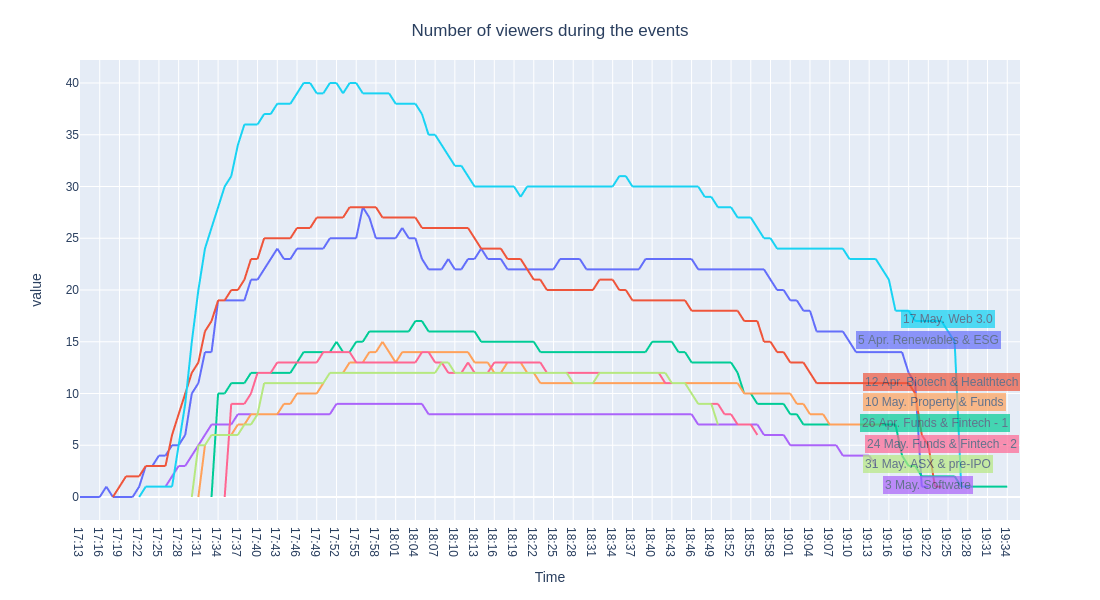

In [55]:
linechart_pivot = px.line(
    data_frame=pivot_timetable,
    x='Time',
    y=['Watching_05_04_2022', 'Watching_12_04_2022',
       'Watching_26_04_2022', 'Watching_03_05_2022',
       'Watching_10_05_2022', 'Watching_17_05_2022',
       'Watching_24_05_2022', 'Watching_31_05_2022'],
    labels={'Watching_05_04_2022' : '05_04_2022',
            'Watching_12_04_2022' : '12_04_2022',
            'Watching_26_04_2022' : '26_04_2022',
            'Watching_03_05_2022' : '03_05_2022',
            'Watching_10_05_2022' : '10_05_2022',
            'Watching_17_05_2022' : '17_05_2022',
            'Watching_24_05_2022' : '24_05_2022',
            'Watching_31_05_2022' : '31_05_2022'},
    height=600,
    width=1100,
    )

linechart_pivot.update_layout(
    title='Number of viewers during the events',
    title_x=0.5,
    title_y=0.96, showlegend=False
    )

linechart_pivot.add_annotation(x='19:25', y=16,
            text="17 May. Web 3.0",
            showarrow=False,
            yshift=12,
            bordercolor="#0DD1F3",
            bgcolor='#0DD1F3',
            opacity=0.7
            )

linechart_pivot.add_annotation(x='19:22', y=14,
            text="5 Apr. Renewables & ESG",
            showarrow=False,
            yshift=12,
            bordercolor="#636EFA",
            bgcolor='#636EFA',
            opacity=0.7
            )

linechart_pivot.add_annotation(x='19:24', y=10,
            text="12 Apr. Biotech & Healthtech",
            showarrow=False,
            yshift=12,
            bordercolor="#EF553B",
            bgcolor='#EF553B',
            opacity=0.7
            )

linechart_pivot.add_annotation(x='19:23', y=8,
            text="10 May. Property & Funds",
            showarrow=False,
            yshift=12,
            bordercolor="#FFA15A",
            bgcolor='#FFA15A',
            opacity=0.7
            )

linechart_pivot.add_annotation(x='19:23', y=6,
            text="26 Apr. Funds & Fintech - 1",
            showarrow=False,
            yshift=12,
            bordercolor="#00CC96",
            bgcolor='#00CC96',
            opacity=0.7
            )

linechart_pivot.add_annotation(x='19:22', y=0,
            text="3 May. Software",
            showarrow=False,
            yshift=12,
            bordercolor="#AA61FA",
            bgcolor='#AA61FA',
            opacity=0.7
            )

linechart_pivot.add_annotation(x='19:24', y=4,
            text="24 May. Funds & Fintech - 2",
            showarrow=False,
            yshift=12,
            bordercolor="#FF6692",
            bgcolor='#FF6692',
            opacity=0.7
            )

linechart_pivot.add_annotation(x='19:22', y=2,
            text="31 May. ASX & pre-IPO",
            showarrow=False,
            yshift=12,
            bordercolor="#B6E880",
            bgcolor='#B6E880',
            opacity=0.7
            )

linechart_pivot.show('png')


In [63]:
# linechart_pivot_file_name = (' - Minute Line Chart Pivot - ' + timestamp)
# pio.write_image(linechart_pivot, (location_windows + linechart_pivot_file_name + '.png'), format='png', width=1100, height=600)